In [1]:
#### Load the dataset
import pandas as pd
import numpy as np
from google.colab import files

file = files.upload() # upload file from local drive
df = pd.read_csv("OnlineNewsPopularity.csv")

Saving OnlineNewsPopularity.csv to OnlineNewsPopularity.csv


          timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       n_non_stop_words  n_non_stop_unique_tokens     num_hrefs  \
count      39644.000000              39644.000000  39644.000000   
mean           0.996469                  0.689175     10.883690   
std            5.231231                  3.264816     11.332017   
min            0.000000                  0.000000      0.000000  

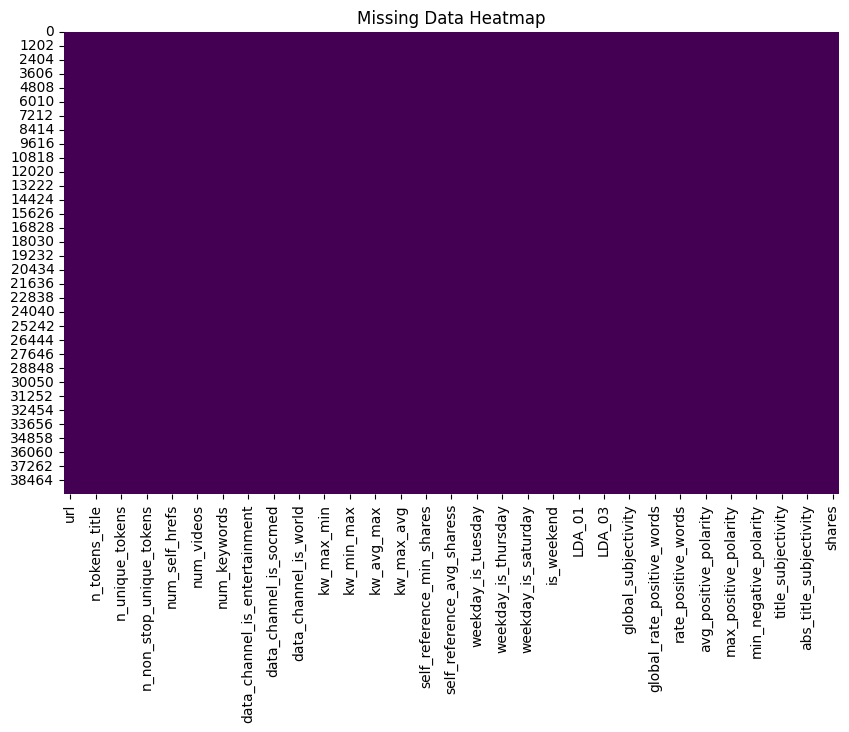

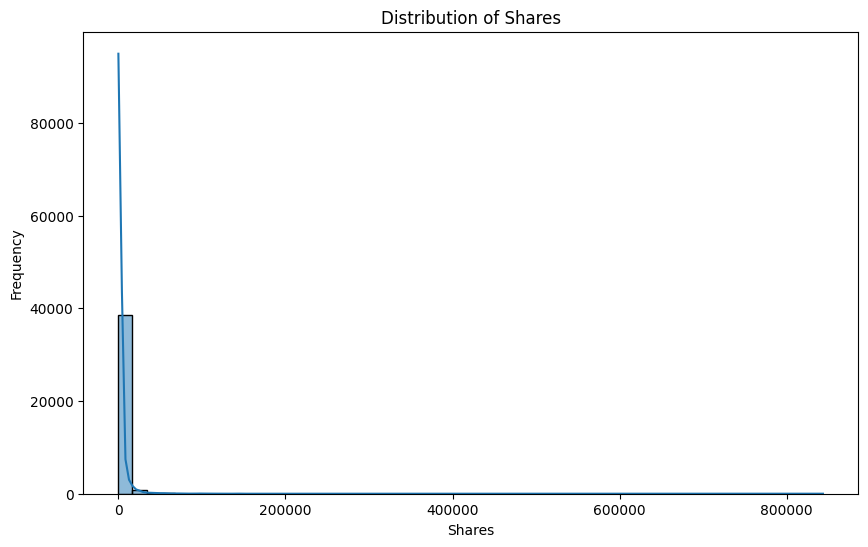

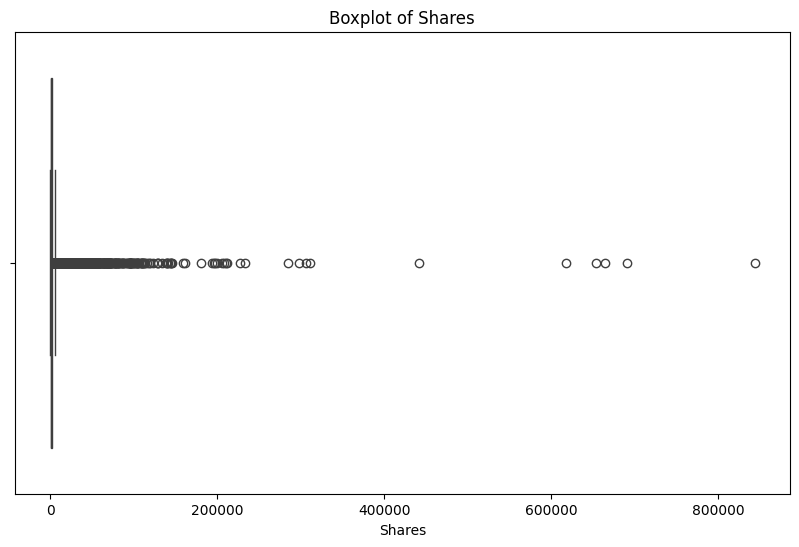

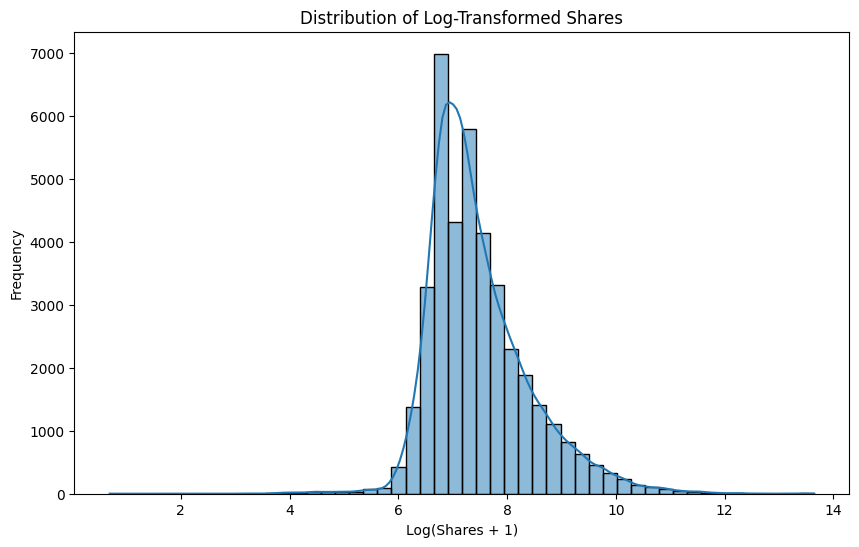

Correlation with Shares:
 shares                   1.000000
log_shares               0.510181
kw_avg_avg               0.110413
LDA_03                   0.083771
kw_max_avg               0.064306
                           ...   
max_negative_polarity   -0.019300
average_token_length    -0.022007
avg_negative_polarity   -0.032029
data_channel_is_world   -0.049497
LDA_02                  -0.059163
Name: shares, Length: 61, dtype: float64


/tmp/ipython-input-1577174626.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_shares.index, y=corr_shares.values, palette='coolwarm')


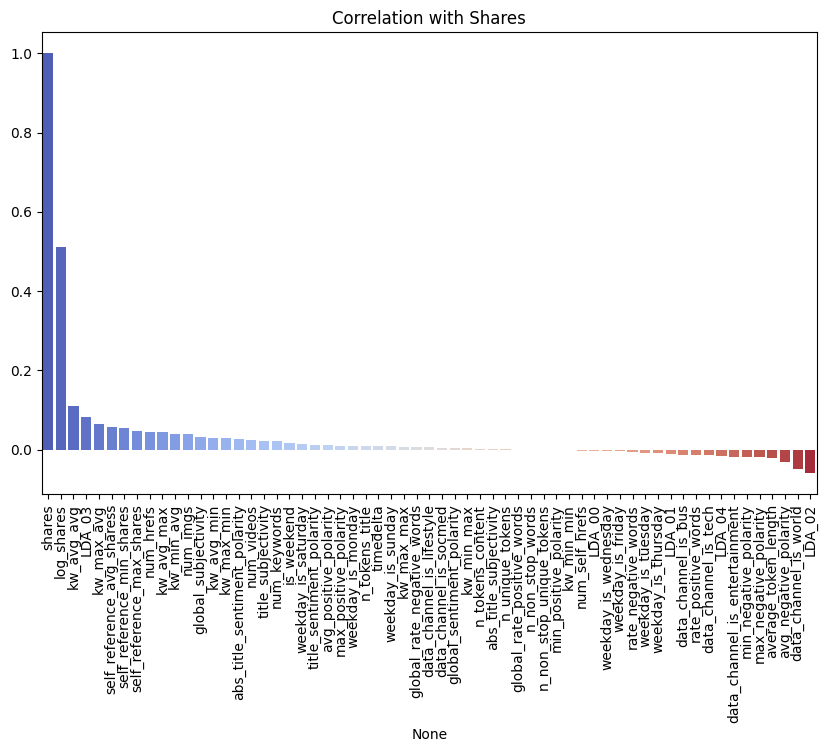

Categorical columns: Index(['url'], dtype='object')


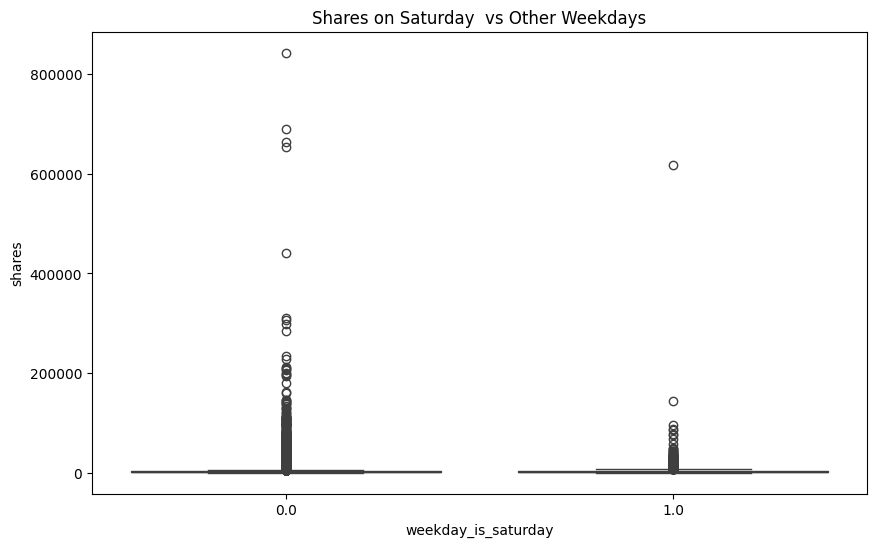

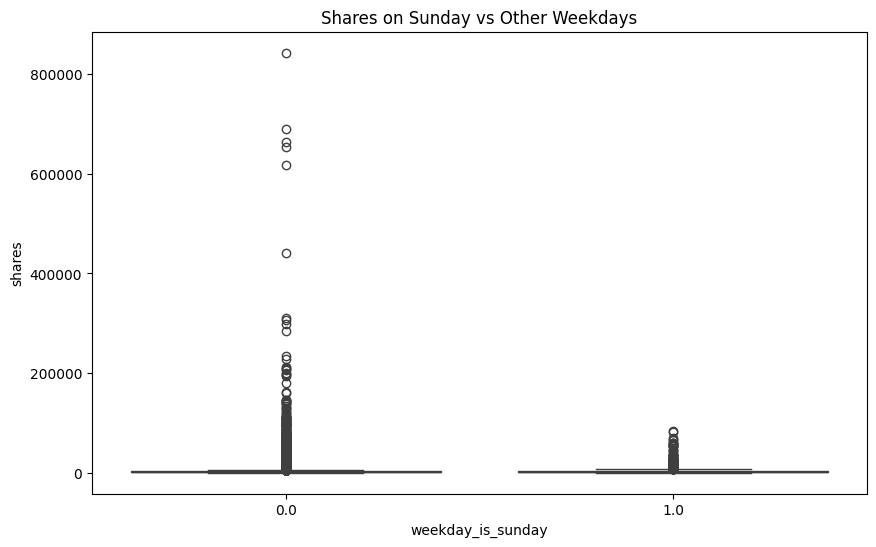

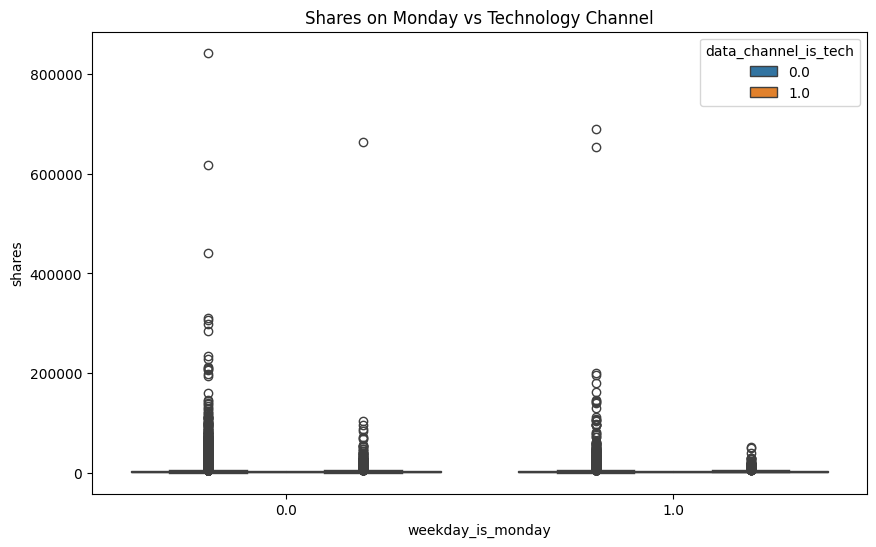

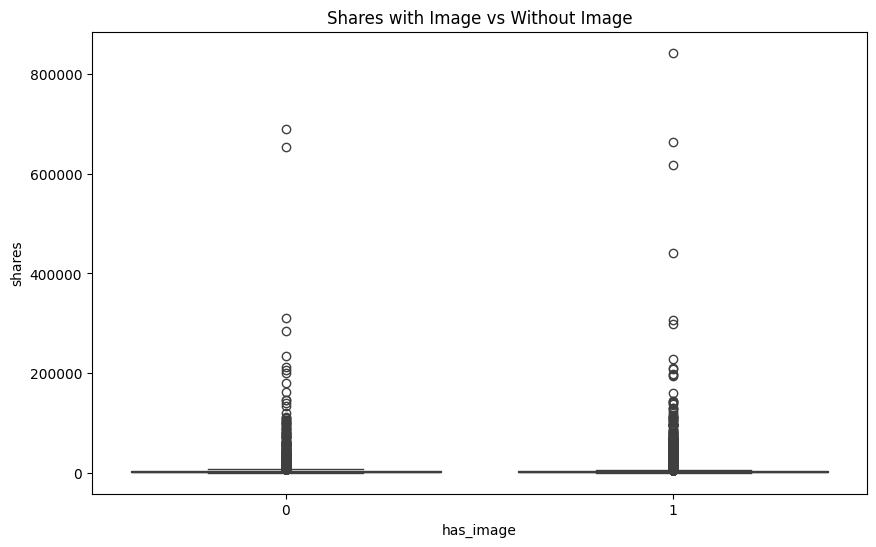

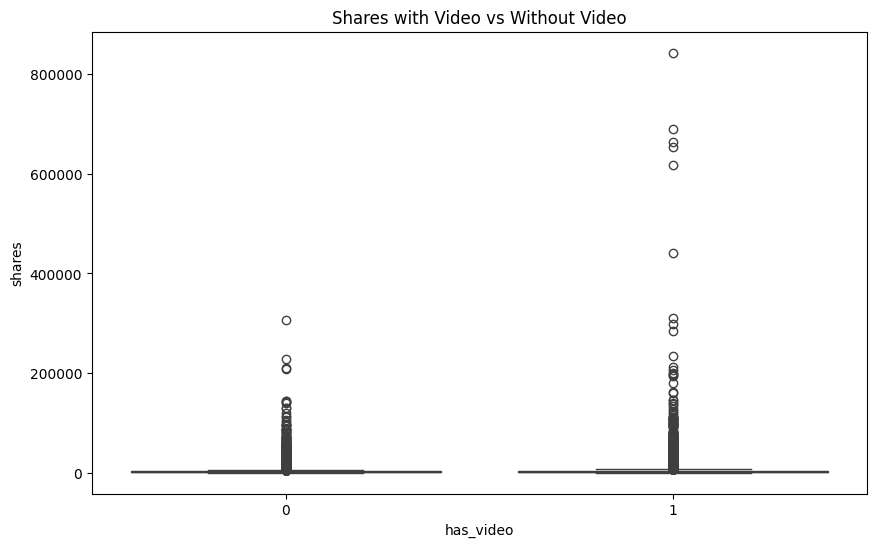

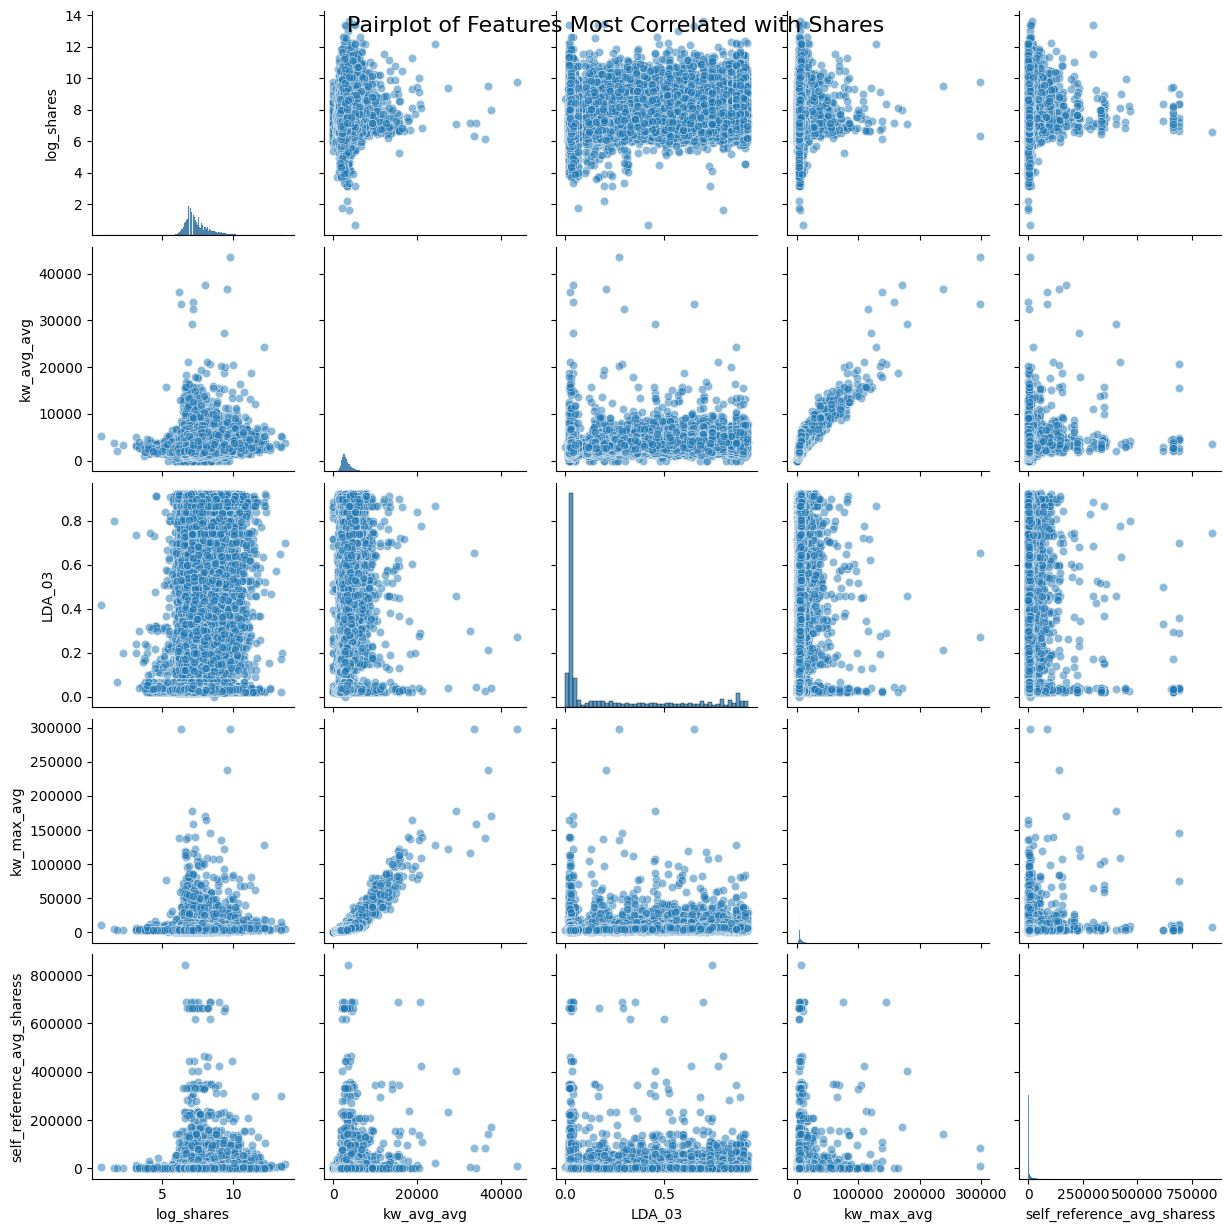

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Basic ###############

# Display first few rows of the dataframe
df.head()

# Clean column names by stripping whitespace
df.columns = df.columns.str.strip()

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
missing_data = df.isnull().sum()
print("Missing Values:\n", missing_data)

# Visualize missing data heatmap (if any)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

print("\n")

################ Understanding target variable ##############################
# Distribution of the target 'shares'
plt.figure(figsize=(10,6))
sns.histplot(df['shares'], bins=50, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

print("\n")

# Boxplot of shares to identify outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['shares'])
plt.title('Boxplot of Shares')
plt.xlabel('Shares')
plt.show()

print("\n")

# Log-transformed target for skewness
df['log_shares'] = np.log1p(df['shares'])
plt.figure(figsize=(10,6))
sns.histplot(df['log_shares'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Shares')
plt.xlabel('Log(Shares + 1)')
plt.ylabel('Frequency')
plt.show()

#### Understanding key features #####################
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation with 'shares'
corr_shares = numeric_df.corr()['shares'].sort_values(ascending=False)

print("Correlation with Shares:\n", corr_shares)

# Plot the most correlated features with shares
plt.figure(figsize=(10,6))
sns.barplot(x=corr_shares.index, y=corr_shares.values, palette='coolwarm')
plt.title('Correlation with Shares')
plt.xticks(rotation=90)
plt.show()

###### Categorical feature analysis

# Categorical features list
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

### Analyzing the relationship between weekday and shares

# Weekday vs Shares (using binary flags for weekdays)
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday_is_saturday', y='shares', data=df)
plt.title('Shares on Saturday  vs Other Weekdays')
plt.show()

# Weekday effect on shares (additional comparison)
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday_is_sunday', y='shares', data=df)
plt.title('Shares on Sunday vs Other Weekdays')
plt.show()

##### Feature interaction #######################################

# Weekday and channel interaction (example with technology channel)
plt.figure(figsize=(10,6))
sns.boxplot(x='weekday_is_monday', y='shares', hue='data_channel_is_tech', data=df)
plt.title('Shares on Monday vs Technology Channel')
plt.show()

# Interaction between image and video presence with shares
# Categorize num_imgs into binary
df['has_image'] = (df['num_imgs'] > 0).astype(int)
df['has_video'] = (df['num_videos'] > 0).astype(int)

plt.figure(figsize=(10,6))
sns.boxplot(x='has_image', y='shares', data=df)
plt.title('Shares with Image vs Without Image')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='has_video', y='shares', data=df)
plt.title('Shares with Video vs Without Video')
plt.show()

### Pairplot to visualize relationship

# Pairplot of top numerical features correlated with 'shares'
top_corr_cols = corr_shares.index[1:6]  # Top 5 correlated features with 'shares'
sns.pairplot(df[top_corr_cols], plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Features Most Correlated with Shares', fontsize=16)
plt.show()





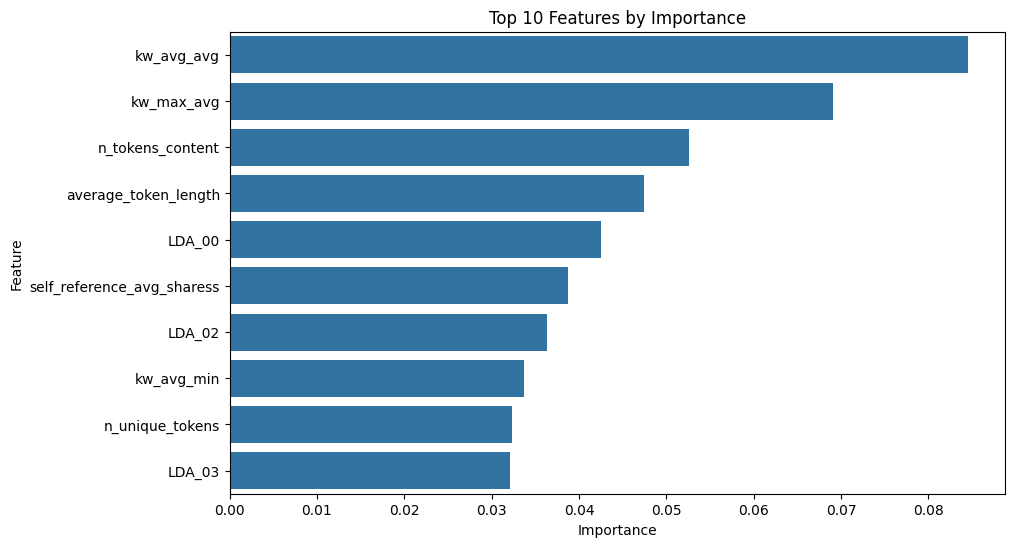

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features only
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target column from feature list
if 'shares' in num_cols:
    num_cols.remove('shares')

if 'log_shares' in num_cols:
    num_cols.remove('log_shares')

# Fit RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(df[num_cols], df['shares'])

# Extract feature importance
features = num_cols
importances = rf.feature_importances_

feat_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10,6))
sns.barplot(data=feat_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Features by Importance')
plt.show()
a